In [54]:
library(tidyverse)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
df <- read.csv("insurance.csv")

In [3]:
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [4]:
model <- lm(charges ~ age + sex + bmi + children + smoker + region, data = df)

In [5]:
summary(model)


Call:
lm(formula = charges ~ age + sex + bmi + children + smoker + 
    region, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,

In [6]:
null_model <- lm(charges ~ age + bmi + children + smoker, data = df)
summary(null_model)


Call:
lm(formula = charges ~ age + bmi + children + smoker, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11897.9  -2920.8   -986.6   1392.2  29509.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12102.77     941.98 -12.848  < 2e-16 ***
age            257.85      11.90  21.675  < 2e-16 ***
bmi            321.85      27.38  11.756  < 2e-16 ***
children       473.50     137.79   3.436 0.000608 ***
smokeryes    23811.40     411.22  57.904  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6068 on 1333 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7489 
F-statistic: 998.1 on 4 and 1333 DF,  p-value: < 2.2e-16


In [13]:
null.adj.r.squared <- summary(null_model)$adj.r.squared

In [12]:
vars <- c("age", "bmi", "children", "smoker")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


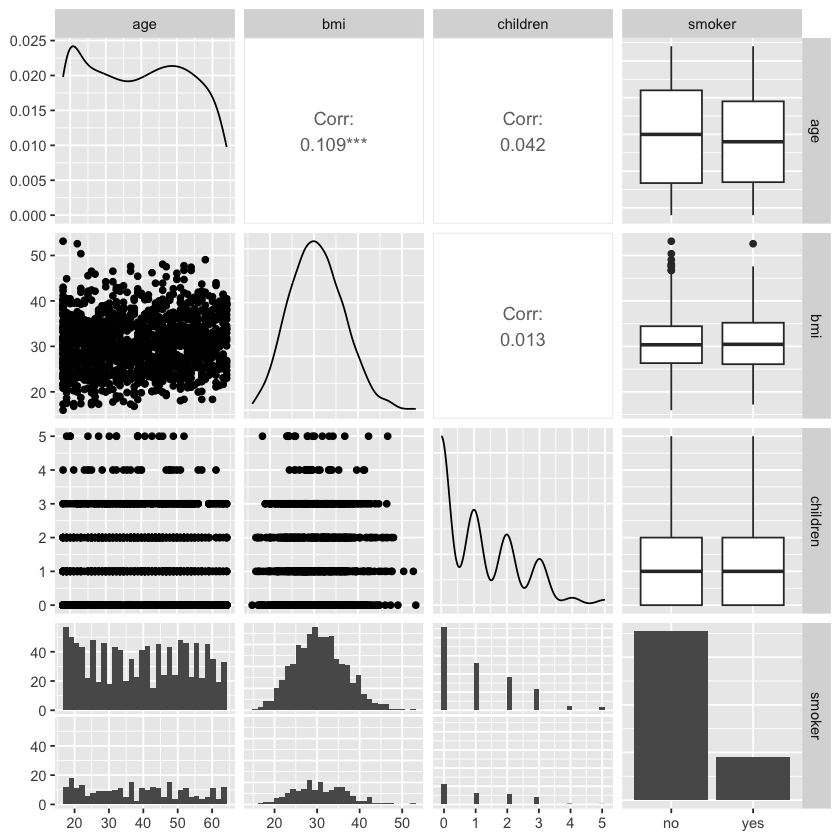

In [58]:
ggpairs(df[vars])

In [26]:
r.squared.vec <- 0

In [29]:
for (i in seq_along(vars)) {
    var <- vars[i]
    model <- lm(as.formula(paste("charges ~", paste(c(vars[-i]), collapse = " + "))), data = df)
    r.squared.vec[i] <- summary(model)$adj.r.squared
}

In [31]:
null.adj.r.squared - r.squared.vec

[1] 0.08822524 0.02582147 0.00203416 0.63082402

In [32]:
length(df$charges)

[1] 1338

In [72]:
# With Bootstrapping

r.squared.matrix <- matrix(0, nrow = 1000, ncol = length(vars))
total.r.squared <- 0
for (i in seq_along(vars)) {
    var <- vars[i]
    for (j in 1:1000) {
        sample_df <- df[sample(nrow(df), replace = TRUE), ]
        full_model <- lm(as.formula(paste("charges ~", paste(c(vars[-i], var), collapse = " + "))), data = sample_df)
        model <- lm(as.formula(paste("charges ~", paste(c(vars[-i]), collapse = " + "))), data = sample_df)
        r.squared.matrix[j, i] <- summary(full_model)$adj.r.squared - summary(model)$adj.r.squared
        total.r.squared <- summary(full_model)$adj.r.squared
    }
}

In [73]:
r.squared.matrix[1:25, ]

0.08548678,0.02929353,0.001434404,0.6081702
0.07938827,0.02795801,0.001037563,0.6063442
0.08203585,0.03209347,0.002348407,0.6074721
0.09707262,0.02755286,0.002259742,0.6448379
0.08529731,0.02705790,0.001750632,0.6495570
0.09399176,0.02640962,0.001983536,0.6303941
0.08473318,0.02333839,0.002434722,0.6458805
0.08140122,0.02724809,0.001891206,0.6233359
0.07680263,0.02191974,0.003802064,0.6325214
0.08510182,0.03064946,0.002864472,0.6204656
0.09913332,0.02685960,0.001037570,0.6069304


In [74]:
# Calculate column means
column_means <- colMeans(r.squared.matrix)

# Calculate 95% confidence intervals using quantile method
ci_lower <- apply(r.squared.matrix, 2, quantile, probs = 0.025)
ci_upper <- apply(r.squared.matrix, 2, quantile, probs = 0.975)


In [75]:
# Create a summary table
data.frame(
  variable = vars,
  mean = column_means,
  ci_lower = ci_lower,
  ci_upper = ci_upper
)

variable,mean,ci_lower,ci_upper
<chr>,<dbl>,<dbl>,<dbl>
age,0.088783606,0.0716402610,0.10666424
bmi,0.025706382,0.0173689351,0.03455993
children,0.002214975,0.0002968438,0.00509640
smoker,0.630657448,0.5958688610,0.66537646


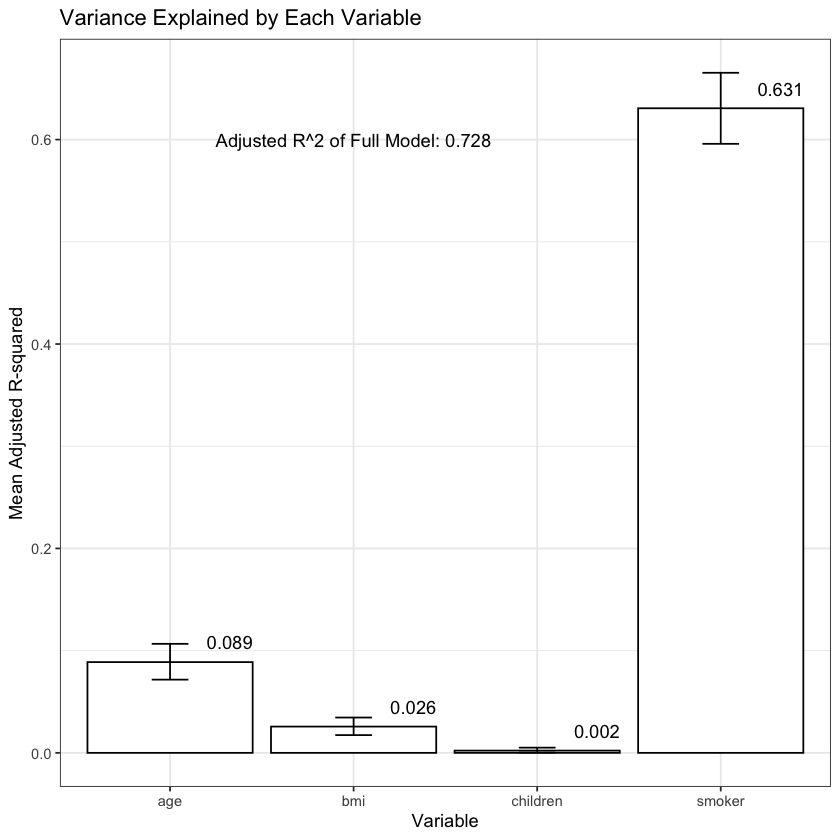

In [98]:
data.frame(
  variable = vars,
  mean = column_means,
  ci_lower = ci_lower,
  ci_upper = ci_upper
) %>%
  mutate(variable = factor(variable, levels = vars)) %>%
  ggplot(aes(x = variable, y = mean)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), width = 0.2) +
  geom_text(aes(label = round(mean, 3)), vjust = -1, hjust = -0.8) +
  annotate("text", x = "bmi", y = 0.6, label = paste("Adjusted R^2 of Full Model:", round(mean(total.r.squared), 3))) +
  labs(title = "Variance Explained by Each Variable",
       x = "Variable",
       y = "Mean Adjusted R-squared") +
  theme_bw()